In [14]:
import csv
from sklearn import svm
import pandas as pd
import numpy as np

train_set = pd.read_csv('train.csv', nrows=8000)

train_set.head()





,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,...,8000.000000,8000.000000,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0
mean,4.439250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.165375,0.126500,0.021250,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.889092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.743030,5.002812,1.487389,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train_set.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,...,8000.000000,8000.000000,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0
mean,4.439250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.165375,0.126500,0.021250,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.889092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.743030,5.002812,1.487389,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Visualizing some of the figures </h3>

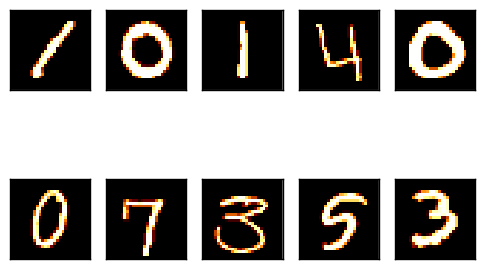

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

pixels = train_set.drop("label",axis=1)

for Num in range(0,10):
    plt.subplot(2,5,Num + 1)
    digit = pixels.iloc[Num].as_matrix().reshape(28,28) 
    plt.imshow(digit, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])


<h3>checking if there is any Null values in the data set</h3>

In [3]:
train_set.isnull().values.any()

False

<h3>shuffling the rows</h3>

In [4]:
df= train_set.reindex(np.random.permutation(train_set.index))

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6429,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5172,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5173,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4531,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> Spliting the data to target and samples for training </h3>

In [5]:
pixels_col = [col for col in df.columns if col != 'label']

samples = df[pixels_col]
target = df['label']



<h3> spliting the samples to train, test and cross validation sets </h3> 

In [6]:
number_of_samples = len(df)

train_length = int(number_of_samples * 0.8)


train_target = target.iloc[:train_length].values
train_samples = samples.iloc[:train_length,:].values
test_target = target.iloc[train_length:].values
test_samples = samples.iloc[int(train_length):,].values


<h3>Reducing the data dimension using Principal component analysis (PCA) in sklearn, the data</h3>


In [7]:
from sklearn.decomposition import PCA

n_components = 25

pca = PCA(n_components=n_components,whiten=True).fit(train_samples)


train_samples_pca = pca.transform(train_samples)

test_samples_pca = pca.transform(test_samples)



<h3>Using search grid to find the best kernel for the classification</h3>

In [8]:

from sklearn.grid_search import GridSearchCV

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3],
                                   'C': [1, 10, 100, 1000]},
                                  {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}]

svm_grid = GridSearchCV(svm.SVC(), param_grid, cv=2)
svm_fit = svm_grid.fit(train_samples_pca , train_target)
best_params = svm_grid.best_params_
best_kernel = best_params.get('kernel')
best_C = best_params.get('C')
best_gamma = best_params.get('gamma')
items = best_params
items

/home/mahsarm/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mahsarm/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

<h2> training the data using SVM classification </h2>

In [9]:
clf_SVM = svm.SVC(C=10, gamma=0.1, kernel='rbf')
clf_SVM.fit(train_samples_pca, train_target)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<h2>calculating the prediction score</h2>

In [10]:

clf_SVM.score(test_samples_pca , test_target)

0.96437499999999998

<h4>0.96 score isnt too bad for 8000 samples!</h4>

<h2>making the sumbission data set for kaggle </h2>

In [11]:
test_set = pd.read_csv('test.csv')

predicted_digits = clf_SVM.predict(pca.transform(test_set))


In [12]:
columns = ['ImageId','Label']
sub_df= pd.DataFrame( columns=columns)
sub_df['Label'] = predicted_digits
sub_df['ImageId'] = sub_df.index + 1
sub_file = sub_df.to_csv('submission.csv', index=False)


In [13]:
submission_set = pd.read_csv('sample_submission.csv' , nrows= 10)

submission_set

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0
